In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

#Visualization Tools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# AI Workflow Module
from model_classifier import ModelClassifier, CustomClassifier

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Use for saving model 
import joblib

# Environment Parameters

plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100 
plt.style.use('ggplot')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Preparation

In [2]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled.csv',index_col=0)
train_df.head()

,sample_type,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,AQP8,APOC4-APOC2,...,AMDHD2.2,AMDHD2.3,MTPN,PFN1P8,HAR1A,HAR1B,PRCD,RELL1,PSAPL1,TVP23A,ESRG,C11orf83,GAGE12J.15,GAGE12J.16,GAGE12J.17,GAGE12J.18,GAGE12J.19,ZBTB11-AS1,SNHG14.16,SNHG14.17,SNHG14.18,SNHG14.19,SNHG14.20,SNHG14.21,SNHG14.22,SNHG14.23,SNORD116-20,SNORD116-20.1,SNHG14.24,SNHG14.25,SNHG14.26,SNHG14.27,SNHG14.28,SNHG14.29,SNHG14.30,SNHG14.31,SNHG14.32,SNHG14.33,SNHG14.34,SNHG14.35,SNHG14.36,SNHG14.37,SNHG14.38,SNHG14.39,FOXD4L2,DDTL,TLX1NB,CDKN2B-AS1,SIGLEC14,MIMT1,SNHG8.2,SNHG8.3,HAVCR1P1,POM121C,ZSCAN30,RP3-324O17.4,GAGE2E.2,GAGE2E.3,TMEM170B,FAM138E,HOTAIR,ZGLP1,FAM86JP,FMR1-AS1,RP11-359E10.1,EGOT,GHRLOS,RP11-93B14.5,C10orf131,DPPA2P2,RP11-379K17.4,TMPO-AS1,RP11-713P17.3,DNM1P35,TRAPPC3L,FAM225B,CTAGE9.2,CTAGE9.3,C19orf71,ACVR2B-AS1,HPN-AS1,OST4,LINC00476,SRRM2-AS1,GPR158-AS1,LINC01003,ZBTB42,KTN1-AS1,KHDC1L,C1orf68,NRADDP,GABPB1-AS1,FAM106B.2,FAM106B.3,RPL19P12,ZNF37BP,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,gender_male,ethnicity_not hispanic or latino,ethnicity_not reported,treatments_pharmaceutical_treatment_or_therapy_not reported,treatments_pharmaceutical_treatment_or_therapy_yes,treatments_radiation_treatment_or_therapy_n

In [3]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled.csv',index_col=0)
test_df.head()

,sample_type,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,AADAC,AAMP,AANAT,AARS,ABAT,ABCA1,ABCA2,ABCA3,ABCB7,ABCF1,ABCA4,ABL1,AOC1,ABL2,ABO,ABR,ACAA1,ACACA,ACACB,ACADL,ACADM,ACADS,ACADSB,ACADVL,ACAT1,ACAT2,ASIC2,ASIC1,ACHE,ACLY,ACO1,ACR,ACO2,ACOX1,ACP1,ACP2,ACP5,ACPP,ACRV1,ACTA1,ACTA2,ACTG1,ACTG1.1,ACTC1,ACTG1.2,ACTG1.3,ACTG2,ACTN4,ACTL6A,ACTN1,ACTN2,ACTN3,ACVR1,ACVR1B,ACVR2A,ACVR2B,ACVRL1,ACY1,ACYP1,ACYP2,ADA,ADAM8,ADAM10,ADAR,ADARB1,ADARB2,ADCY1,ADCY2,ADCY3,ADCY5,ADCY6,ADCY7,ADCY8,ADCY9,ADCYAP1,ADCYAP1R1,ADD1,ADD2,ADD3,PLIN2,ADH1A,ADH1B,ADH1C,ADH4,ADH5,ADH6,ADH7,ADK,ADM,ADORA1,ADORA2A,ADORA2B,ADORA3,ADPRH,PARP1,PARP4,ADRA1D,ADRA1B,ADRA1A,ADRA2A,ADRA2B,ADRA2C,ADRB1,ADRB2,ADRB3,ADRBK1,ADRBK2,ADSL,ADSS,AP2A1,AP2A2,AP1B1,AP2B1,AP1G1,AEBP1,AES,AFG3L1P,AFM,AFP,AGA,ACAN,AGER,AGL,AGRP,JAG1,AGT,AGTR1,AGTR2,APLNR,AGXT,NR0B1,AHCY,AHR,AHSG,AIF1,AIM1,AK1,RP4-592A1.2,AK4,AKT1,AKT2,ALAD,ALAS1,ALAS2,ALB,ALCAM,ABCD1,ALDH1A1,ALDH2,ALDH3A1,ALDH1B1,ALDH1A3,ALDH3B1,ALDH3B2,ALDH9A1,ALDH3A2,ABCD2,ALDOA,ALDOB,ALDOC,AKR1B1,ALK,ALOX12,ALOX5,ALOX5AP,ALOX12B,ANXA8L2,ANXA8L2.1,ALOX15,ALOX15B,ALPI,ALPL,ALPP,ALPPL2,ALX3,AMBN,AMBP,AMD1,AMELX,AMELY,AMFR,AMH,AMHR2,AMPD1,AMPD2,AMPD3,AMPH,BIN1,AMT,AMY1A,AMY2A,AMY2B,AMY2B.1,ANG,ANGPT1,ANGPT2,ANK1,ANK2,ANK3,ANPEP,SLC25A4,SLC25A5,SLC25A6,ANXA1,ANXA2,ANXA2P2,ANXA3,ANXA4,ANXA5,ANXA6,ANXA7,ANXA11,ANXA13,AOAH,AOC2,AOX1,APAF1,NUDT2,APOF,APBA1,APBA2,APBB1,APBB2,APC,APCS,AIRE,APEH,APEX1,BIRC2,BIRC3,RP11-566F5.1,BIRC5,APLP1,APLP2,APOA1,APOA2,APOA4,APOB,APOC1,APOC1P1,AQP8,APOC4-APOC2,...,AMDHD2.2,AMDHD2.3,MTPN,PFN1P8,HAR1A,HAR1B,PRCD,RELL1,PSAPL1,TVP23A,ESRG,C11orf83,GAGE12J.15,GAGE12J.16,GAGE12J.17,GAGE12J.18,GAGE12J.19,ZBTB11-AS1,SNHG14.16,SNHG14.17,SNHG14.18,SNHG14.19,SNHG14.20,SNHG14.21,SNHG14.22,SNHG14.23,SNORD116-20,SNORD116-20.1,SNHG14.24,SNHG14.25,SNHG14.26,SNHG14.27,SNHG14.28,SNHG14.29,SNHG14.30,SNHG14.31,SNHG14.32,SNHG14.33,SNHG14.34,SNHG14.35,SNHG14.36,SNHG14.37,SNHG14.38,SNHG14.39,FOXD4L2,DDTL,TLX1NB,CDKN2B-AS1,SIGLEC14,MIMT1,SNHG8.2,SNHG8.3,HAVCR1P1,POM121C,ZSCAN30,RP3-324O17.4,GAGE2E.2,GAGE2E.3,TMEM170B,FAM138E,HOTAIR,ZGLP1,FAM86JP,FMR1-AS1,RP11-359E10.1,EGOT,GHRLOS,RP11-93B14.5,C10orf131,DPPA2P2,RP11-379K17.4,TMPO-AS1,RP11-713P17.3,DNM1P35,TRAPPC3L,FAM225B,CTAGE9.2,CTAGE9.3,C19orf71,ACVR2B-AS1,HPN-AS1,OST4,LINC00476,SRRM2-AS1,GPR158-AS1,LINC01003,ZBTB42,KTN1-AS1,KHDC1L,C1orf68,NRADDP,GABPB1-AS1,FAM106B.2,FAM106B.3,RPL19P12,ZNF37BP,RP4-740C4.6,RP11-67L2.2,FAM47E,CCDC152,ZNF737,URAHP,HSFX2,SNAP47.2,SNAP47.3,CCDC166,C17orf107,RP11-193H5.1,LINC00552,CECR7,NFYC-AS1,LINC00910,CXorf64,AC074286.1,CECR5-AS1,LRRC70,LRRC69,SPON2.2,SPON2.3,PSORS1C3,SMIM6,SYCE1L,C7orf72,BSPH1,TSTD1,CCDC183-AS1,TMEM194B,SP9,LINC00893,CD300LD,DBIL5P,AC016629.8,FAM83A-AS1,LINC00271,UBE2DNL,ZNF717,FAM196B,RRN3P3,FAM66E,AC009501.4,NPIPB5.2,NPIPB5.3,TEKT4P2,CLUHP3,KRTAP4-9,GAGE12J.20,GAGE12J.21,GAGE12J.22,GAGE12J.23,GAGE12J.24,NBPF10,FCGR1B,KRTAP4-7,CYP4F30P,DCAF13P3,RP11-169L17.5,PMS2P5.2,PMS2P5.3,FAM66D,FAM182B.3,FAM182B.4,FAM182B.5,GOLGA8EP,GOLGA8EP.1,FAM95B1,FAM182B.6,FAM182B.7,FAM182B.8,UBE2Q2P2,UBE2Q2P2.1,SPANXB2,FAM66A,LINC00240,SBF1P1,MRPL23-AS1,LINC01134,RP11-273G15.2,AC129778.2,UXT-AS1,AC016700.5,MAP3K14-AS1,JHDM1D-AS1,LINC01119,Z97634.3,NDUFB2-AS1,UBE2Q2P2.2,UBE2Q2P2.3,TEN1,POLR2J3.6,POLR2J3.7,POLR2J3.8,C17orf99,CHKB-AS1,LINC00930,KLLN,RNU4ATAC,SCARNA9.2,SCARNA9.3,SRRM5,C19orf69,C17orf96,PRICKLE4.2,PRICKLE4.3,LINC00426,LINC00092,DNMBP-AS1,DCTN1-AS1,RAMP2-AS1,TPT1-AS1,RP11-474D1.3,C5orf52,C2CD4D,ZFHX4-AS1,XXbac-B476C20.17,LINC00704,PCED1B-AS1,RP11-834C11.6,RP11-834C11.7,CTC-308K20.1,RP5-1068E13.7,ARHGEF33,AL121656.5,CTD-2547E10.2.2,CTD-2547E10.2.3,MEF2B,CMC4,LINC00894,BCDIN3D-AS1,LINC00173,ANKRD66,ULK4P1,WASH2P.6,WASH2P.7,WASH2P.8,FRG2C,ZNF605,RP11-55K22.5,RASAL2-AS1,LINC00882,FTX,TICAM2.2,TICAM2.3,SLC25A5-AS1,gender_male,ethnicity_not hispanic or latino,ethnicity_not reported,treatments_pharmaceutical_treatment_or_therapy_not reported,treatments_pharmaceutical_treatment_or_therapy_yes,treatments_radiation_treatment_or_therapy_n

### Feature Selection

In [4]:
features = [
       'gender_male', 'ethnicity_not hispanic or latino',
       'ethnicity_not reported',
       'treatments_pharmaceutical_treatment_or_therapy_not reported',
       'treatments_pharmaceutical_treatment_or_therapy_yes',
       'treatments_radiation_treatment_or_therapy_not reported',
       'treatments_radiation_treatment_or_therapy_yes',
       'age_at_index',
       'bmi',
       'C7', 'KRT17', 'S100A7A', 'CLEC2A', 'KRTDAP', 'WFDC5', 'KRT14',
       'S100A7', 'KLK9', 'LCE3D'
]

model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = features, 
    label_binarizer = False)

## Model Development

In [5]:
# Logistic Regression

lr_pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    }
]

# Support Vector Machines - Linear Kernel

svm_linear_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    }
]

# Support Vector Machines - Polynomial Kernel

svm_poly_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': ['scale', 0.1, 0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Support Vector Machines - Radial Basis Kernel


svm_rbf_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Support Vector Machines - Sigmoid Kernel


svm_sigmoid_pipeline_params = [
    {   
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
]

# Naive Bayes

gnb_pipeline_params = [
    {   
        'clf__estimator': [GaussianNB(priors = None)], 
    },
]

# Random Forest

rf_pipeline_params = [
    {   
        'clf__estimator': [RandomForestClassifier(random_state = 1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]  
    },
]

# All Models in one pipeline without PCA

pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': ['scale', 0.1, 0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': ['scale', 0.1,  0.01, 0.001, 0.00001, 1, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'clf__estimator': [RandomForestClassifier(random_state = 1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]   
    },
    {
        'clf__estimator': [GaussianNB(priors = None)]
    }

]

# All Models in one pipeline with PCA


pca_pipeline_params = [
    {
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],        
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "linear")], 
        'clf__estimator__gamma': [10.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "poly")], 
        'clf__estimator__gamma': [0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    { 
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "sigmoid")], 
        'clf__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    {   
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [SVC(probability=True, kernel = "rbf")], 
        'clf__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10],
        'clf__estimator__decision_function_shape': ["ovo", "ovr"]   
    },
    { 
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [RandomForestClassifier(random_state=1, bootstrap = True)], 
        'clf__estimator__n_estimators': [30, 60, 70, 80, 90],
        'clf__estimator__max_features': [0.6, 0.65, 0.7, 0.75, 0.8],
        'clf__estimator__min_samples_leaf': [6, 8, 10, 12, 14],
        'clf__estimator__min_samples_split':  [2, 3, 5, 7]   
    },
    {
        'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],                
        'clf__estimator': [GaussianNB(priors = None)]
    }

]

### Model Performance [Without PCA]

#### Logistic Regression

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.929):
{'clf__estimator': LogisticRegression(C=100, max_iter=10000, penalty='l1', solver='liblinear'), 'clf__estimator__C': 100, 'clf__estimator__penalty': 'l1'}

Training Performance:
AUC score: 0.9302832244008714
LogLoss score: 0.24474922959656276
Accuracy: 0.9021406727828746
f1 macro: 0.8345560333923603
f1 micro: 0.9021406727828746
f1 weighted: 0.8937330142941026
Precision macro: 0.895420910210047
Precision micro: 0.895420910210047
Precision weighted: 0.895420910210047
Recall macro: 0.7927287581699347
Recall micro: 0.9021406727828746
Recall weighted: 0.9021406727828746

Validation Performance:
AUC score: 0.8812316715542523
LogLoss score: 0.6678164378841485
Accuracy: 0.8652482269503546
f1 macro: 0.7854225070084102
f1 micro: 0.8652482269503546
f1 weighted: 0.8587507846294986
Precision macro: 0.8829572318934021
Precision micro: 0.8829572318934021
Precision weighted: 0.8829572318934021
Recall macro: 0

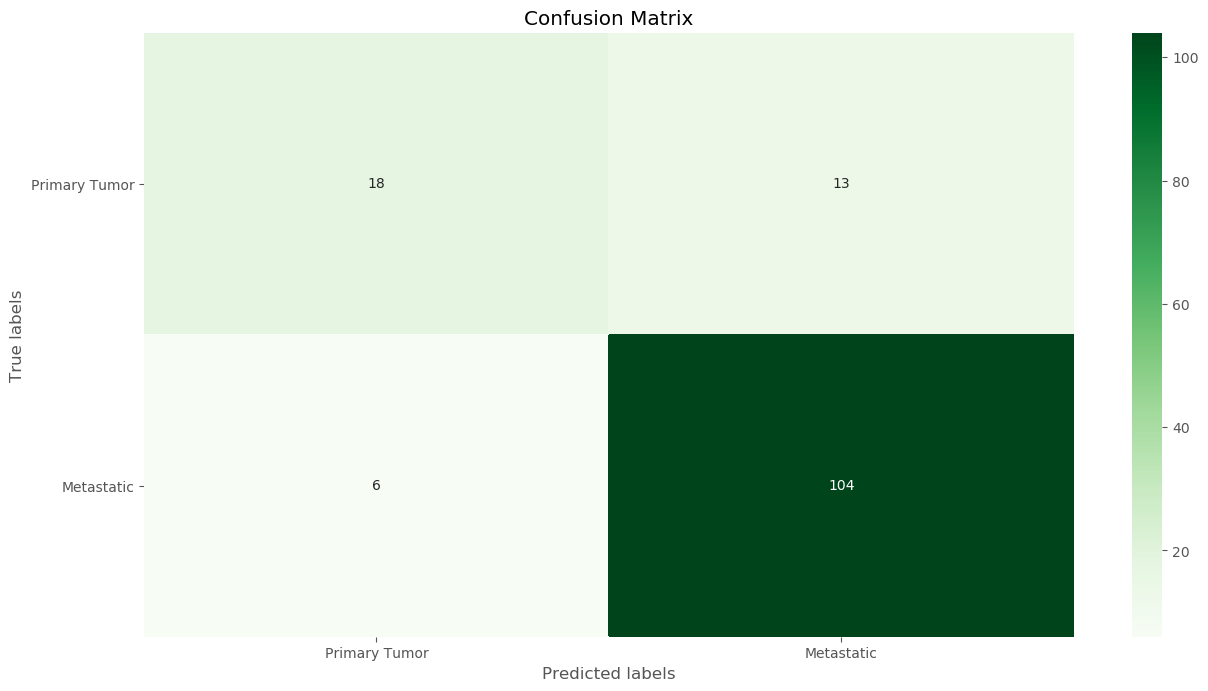

In [6]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(lr_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Support Vector Machines - Linear Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.911):
{'clf__estimator': SVC(decision_function_shape='ovo', kernel='linear', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 'scale'}

Training Performance:
AUC score: 0.9331699346405229
LogLoss score: 0.37671696089578816
Accuracy: 0.8654434250764526
f1 macro: 0.74028880866426
f1 micro: 0.8654434250764526
f1 weighted: 0.8411843804855431
Precision macro: 0.8528428093645485
Precision micro: 0.8528428093645485
Precision weighted: 0.8528428093645485
Recall macro: 0.6944444444444444
Recall micro: 0.8654434250764526
Recall weighted: 0.8654434250764526

Validation Performance:
AUC score: 0.9384164222873901
LogLoss score: 0.40898264456539185
Accuracy: 0.8368794326241135
f1 macro: 0.6717943527982997
f1 micro: 0.8368794326241135
f1 weighted: 0.8022115658606926
Precision macro: 0.8315890757501933
Precision micro: 0.8315890757501933
Precision weighted: 0.83158907575

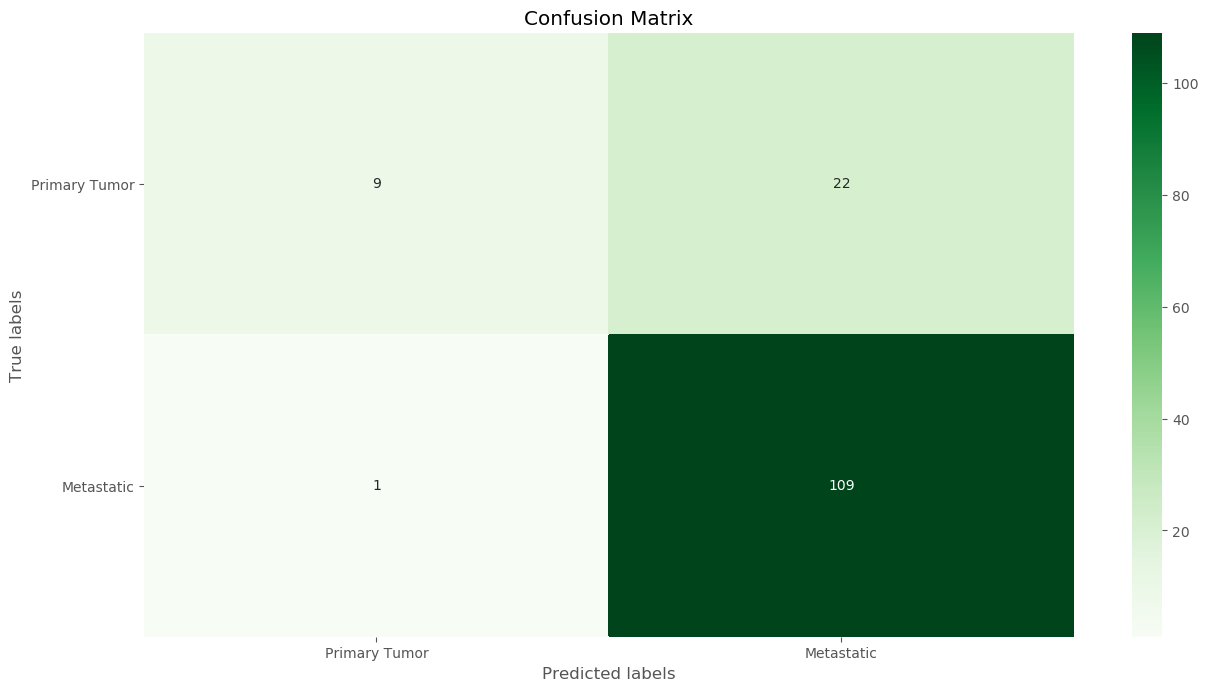

In [7]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_linear_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Support Vector Machines - Polynomial Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.891):
{'clf__estimator': SVC(decision_function_shape='ovo', gamma=0.1, kernel='poly', probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 0.1}

Training Performance:
AUC score: 0.943681917211329
LogLoss score: 0.4777726112846027
Accuracy: 0.8440366972477065
f1 macro: 0.6803519061583577
f1 micro: 0.8440366972477065
f1 weighted: 0.808361806882079
Precision macro: 0.8333333333333334
Precision micro: 0.8333333333333334
Precision weighted: 0.8333333333333334
Recall macro: 0.6458333333333334
Recall micro: 0.8440366972477065
Recall weighted: 0.8440366972477065

Validation Performance:
AUC score: 0.8043988269794721
LogLoss score: 0.49767120773581874
Accuracy: 0.7943262411347518
f1 macro: 0.5685343463121242
f1 micro: 0.7943262411347517
f1 weighted: 0.743412382498277
Precision macro: 0.8038466572621108
Precision micro: 0.8038466572621108
Precision weighted: 0.80384665

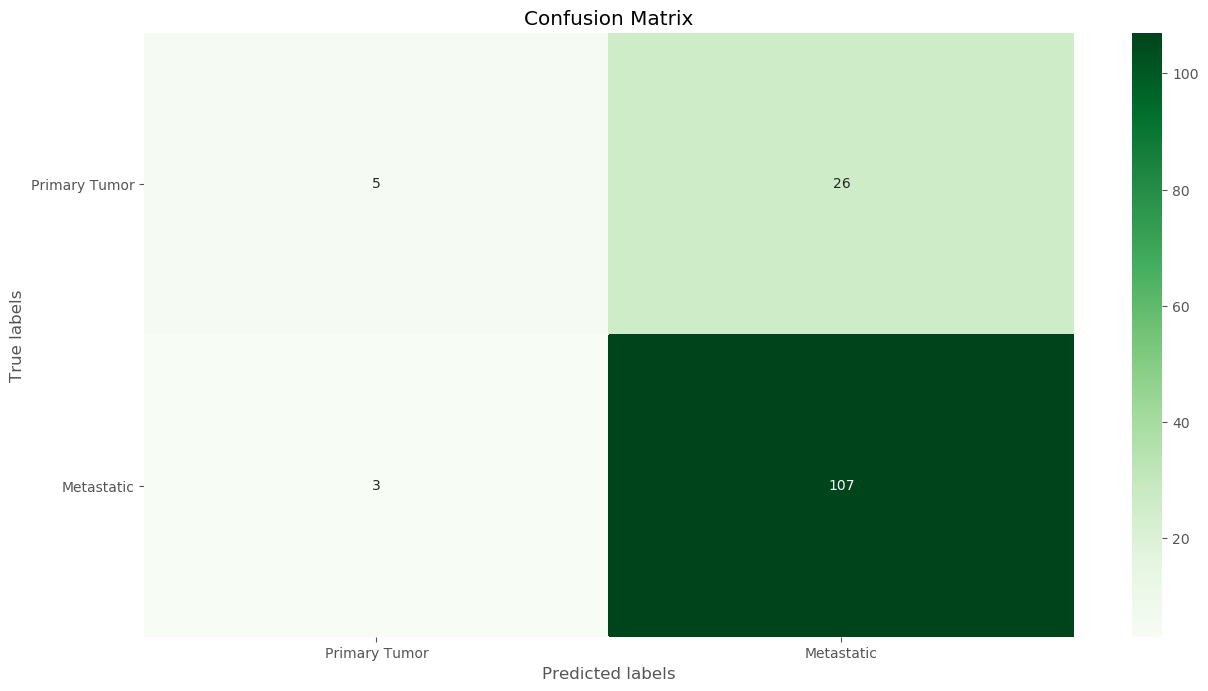

In [8]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_poly_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Support Vector Machines - Radial Basis Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.889):
{'clf__estimator': SVC(decision_function_shape='ovo', gamma=0.1, probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 0.1}

Training Performance:
AUC score: 0.9354030501089324
LogLoss score: 0.30986735632641327
Accuracy: 0.8593272171253823
f1 macro: 0.7239392159741593
f1 micro: 0.8593272171253823
f1 weighted: 0.8321313740993723
Precision macro: 0.8471760797342193
Precision micro: 0.8471760797342193
Precision weighted: 0.8471760797342193
Recall macro: 0.6805555555555556
Recall micro: 0.8593272171253823
Recall weighted: 0.8593272171253823

Validation Performance:
AUC score: 0.8683284457478005
LogLoss score: 0.39607008454191794
Accuracy: 0.8226950354609929
f1 macro: 0.6432547313024997
f1 micro: 0.8226950354609928
f1 weighted: 0.7850125715877092
Precision macro: 0.8236222875170415
Precision micro: 0.8236222875170415
Precision weighted: 0.8236222875170415
Re

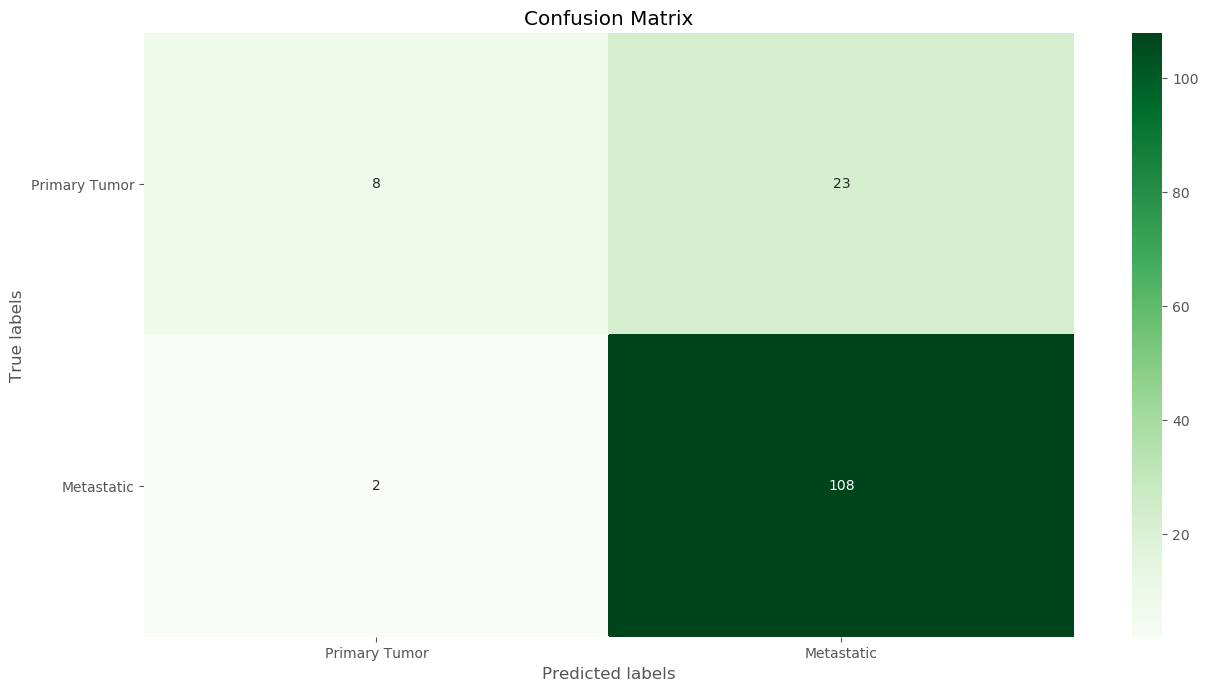

In [9]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_rbf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Support Vector Machines - Sigmoid Kernel

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Best parameter (CV score=0.901):
{'clf__estimator': SVC(decision_function_shape='ovo', gamma=0.1, kernel='sigmoid',
    probability=True), 'clf__estimator__decision_function_shape': 'ovo', 'clf__estimator__gamma': 0.1}

Training Performance:
AUC score: 0.738562091503268
LogLoss score: 0.4842104856325711
Accuracy: 0.8226299694189603
f1 macro: 0.6397036474164133
f1 micro: 0.8226299694189603
f1 weighted: 0.7833753938819329
Precision macro: 0.8222742031088266
Precision micro: 0.8222742031088266
Precision weighted: 0.8222742031088266
Recall macro: 0.6171568627450981
Recall micro: 0.8226299694189603
Recall weighted: 0.8226299694189603

Validation Performance:
AUC score: 0.8143695014662756
LogLoss score: 0.45242548281004114
Accuracy: 0.8156028368794326
f1 macro: 0.6046160483175151
f1 micro: 0.8156028368794325
f1 weighted: 0.766440866729083
Precision macro: 0.8131301904404478
Precision micro: 0.8131301904404478
Precision weighted: 0.

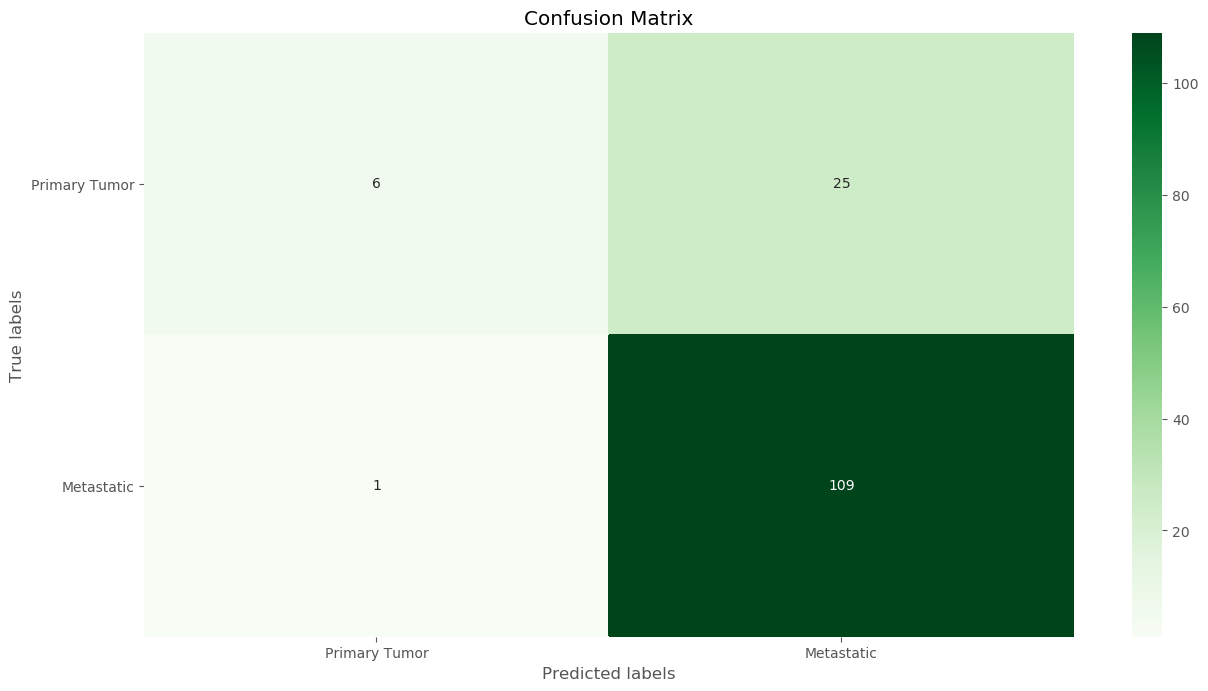

In [10]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(svm_sigmoid_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Naive Bayes

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameter (CV score=0.917):
{'clf__estimator': GaussianNB()}

Training Performance:
AUC score: 0.89229302832244
LogLoss score: 4.184348291415993
Accuracy: 0.8593272171253823
f1 macro: 0.7410480650048202
f1 micro: 0.8593272171253823
f1 weighted: 0.8389896253580458
Precision macro: 0.855449975963708
Precision micro: 0.855449975963708
Precision weighted: 0.855449975963708
Recall macro: 0.7004901960784313
Recall micro: 0.8593272171253823
Recall weighted: 0.8593272171253823

Validation Performance:
AUC score: 0.8818181818181818
LogLoss score: 5.339283994989795
Accuracy: 0.8156028368794326
f1 macro: 0.673611111111111
f1 micro: 0.8156028368794325
f1 weighted: 0.7942277383766745
Precision macro: 0.8355150683222063
Precision micro: 0.8355150683222063
Precision weighted: 0.8355150683222063
Recall macro: 0.6501466275659824
Recall micro: 0.8156028368794326
Recall weighted: 0.8156028368794326


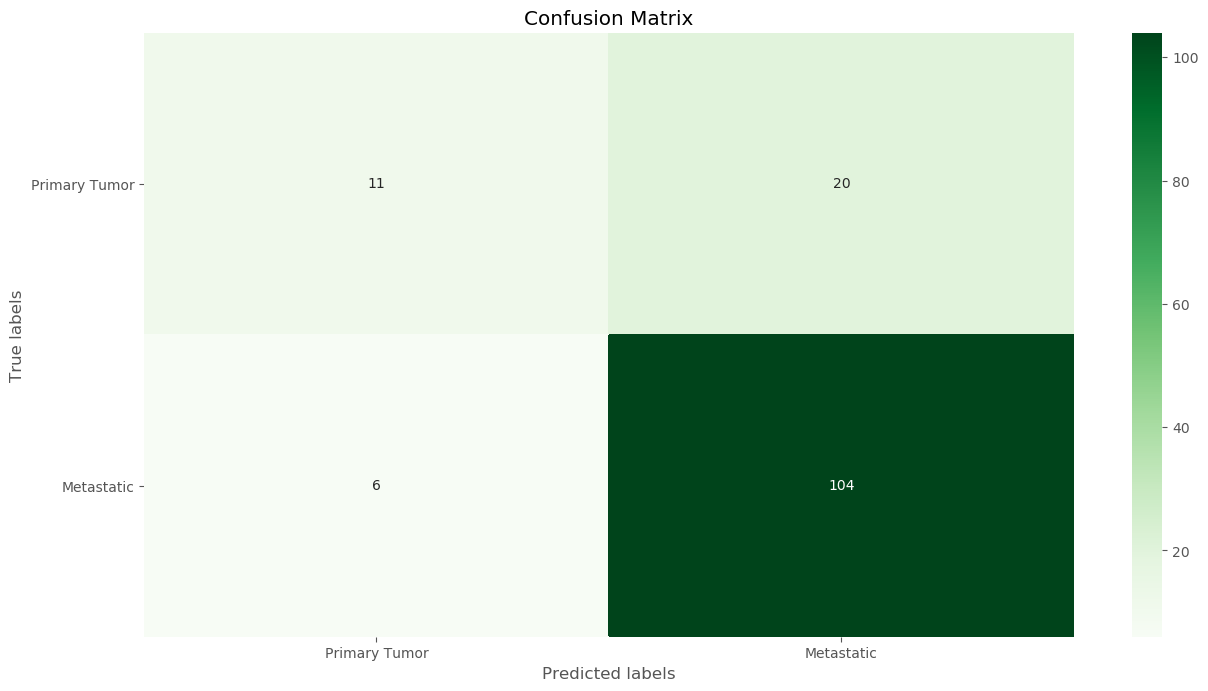

In [11]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(gnb_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### Random Forest

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.939):
{'clf__estimator': RandomForestClassifier(max_features=0.7, min_samples_leaf=8, n_estimators=80,
                       random_state=1), 'clf__estimator__max_features': 0.7, 'clf__estimator__min_samples_leaf': 8, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 80}

Training Performance:
AUC score: 0.9794117647058823
LogLoss score: 0.1746784569486199
Accuracy: 0.9296636085626911
f1 macro: 0.8914608979261974
f1 micro: 0.9296636085626911
f1 weighted: 0.9274974754853641
Precision macro: 0.9324131970509111
Precision micro: 0.9324131970509111
Precision weighted: 0.9324131970509111
Recall macro: 0.8701797385620915
Recall micro: 0.9296636085626911
Recall weighted: 0.9296636085626911

Validation Performance:
AUC score: 0.9483870967741936
LogLoss score: 0.24638800940718347
Accuracy: 0.900709219858156
f1 macro: 0.8615319865319866
f1 micro: 0.900709219858156
f1 weighted: 0.90279

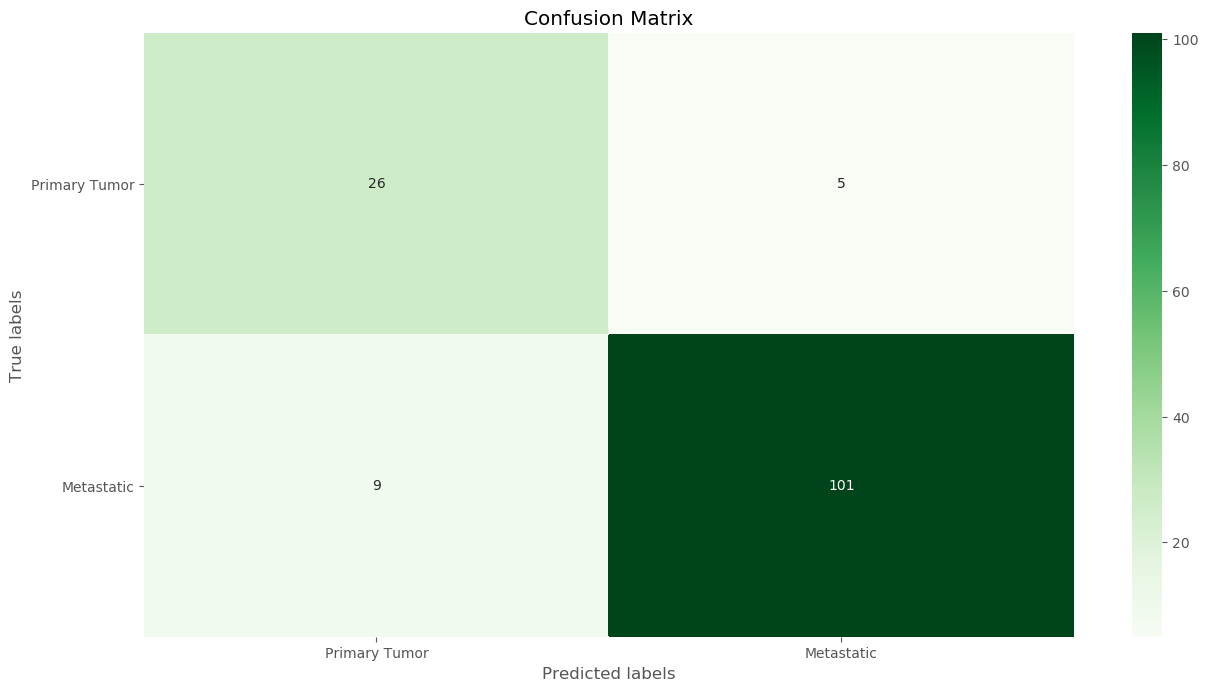

In [12]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(rf_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

#### All Models in one pipeline with PCA

Fitting 2 folds for each of 569 candidates, totalling 1138 fits
Best parameter (CV score=0.939):
{'clf__estimator': RandomForestClassifier(max_features=0.7, min_samples_leaf=8, n_estimators=80,
                       random_state=1), 'clf__estimator__max_features': 0.7, 'clf__estimator__min_samples_leaf': 8, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 80}

Training Performance:
AUC score: 0.9794117647058823
LogLoss score: 0.1746784569486199
Accuracy: 0.9296636085626911
f1 macro: 0.8914608979261974
f1 micro: 0.9296636085626911
f1 weighted: 0.9274974754853641
Precision macro: 0.9324131970509111
Precision micro: 0.9324131970509111
Precision weighted: 0.9324131970509111
Recall macro: 0.8701797385620915
Recall micro: 0.9296636085626911
Recall weighted: 0.9296636085626911

Validation Performance:
AUC score: 0.9483870967741936
LogLoss score: 0.24638800940718347
Accuracy: 0.900709219858156
f1 macro: 0.8615319865319866
f1 micro: 0.900709219858156
f1 weighted: 0.90279

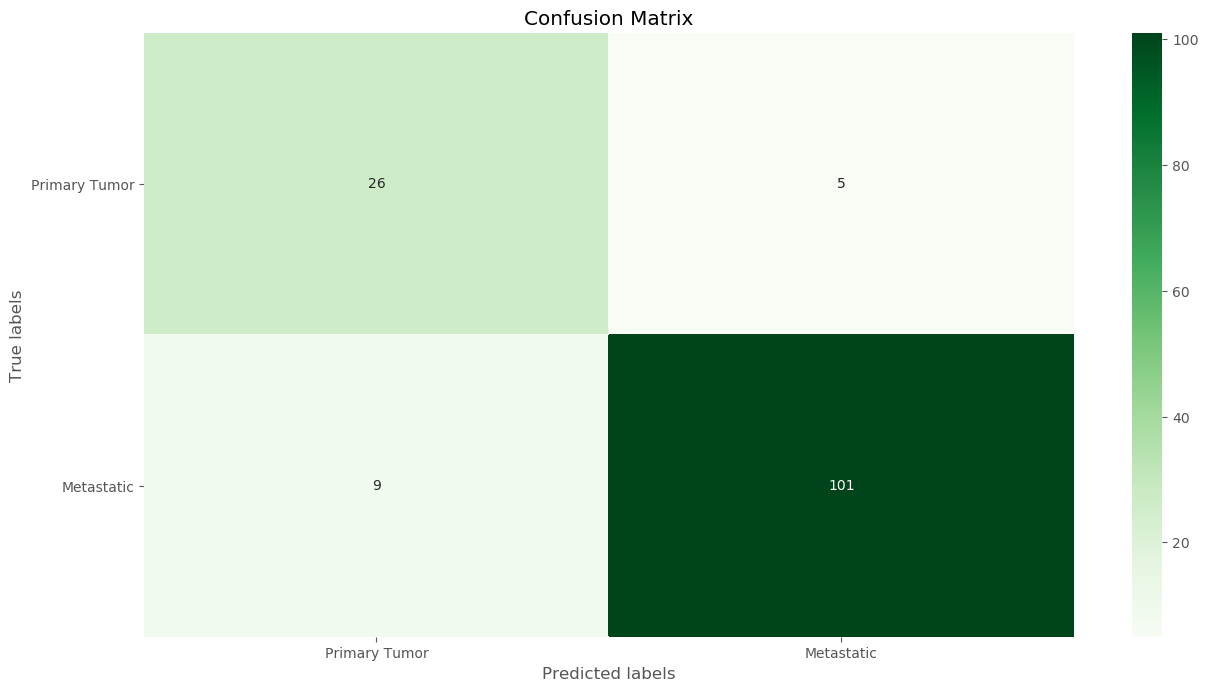

In [13]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

### Model Performance [With PCA]

Fitting 2 folds for each of 2785 candidates, totalling 5570 fits
Best parameter (CV score=0.925):
{'clf__estimator': RandomForestClassifier(max_features=0.6, min_samples_leaf=6, n_estimators=60,
                       random_state=1), 'clf__estimator__max_features': 0.6, 'clf__estimator__min_samples_leaf': 6, 'clf__estimator__min_samples_split': 2, 'clf__estimator__n_estimators': 60, 'pca__n_components': 0.6}

Training Performance:
AUC score: 0.9641067538126361
LogLoss score: 0.23319175423430036
Accuracy: 0.9051987767584098
f1 macro: 0.8485409911996294
f1 micro: 0.9051987767584098
f1 weighted: 0.9003828649859135
Precision macro: 0.908142598647662
Precision micro: 0.908142598647662
Precision weighted: 0.908142598647662
Recall macro: 0.8196078431372549
Recall micro: 0.9051987767584098
Recall weighted: 0.9051987767584098

Validation Performance:
AUC score: 0.898533724340176
LogLoss score: 0.32939227943851745
Accuracy: 0.8652482269503546
f1 macro: 0.8058273537725593
f1 micro: 0.86524822695

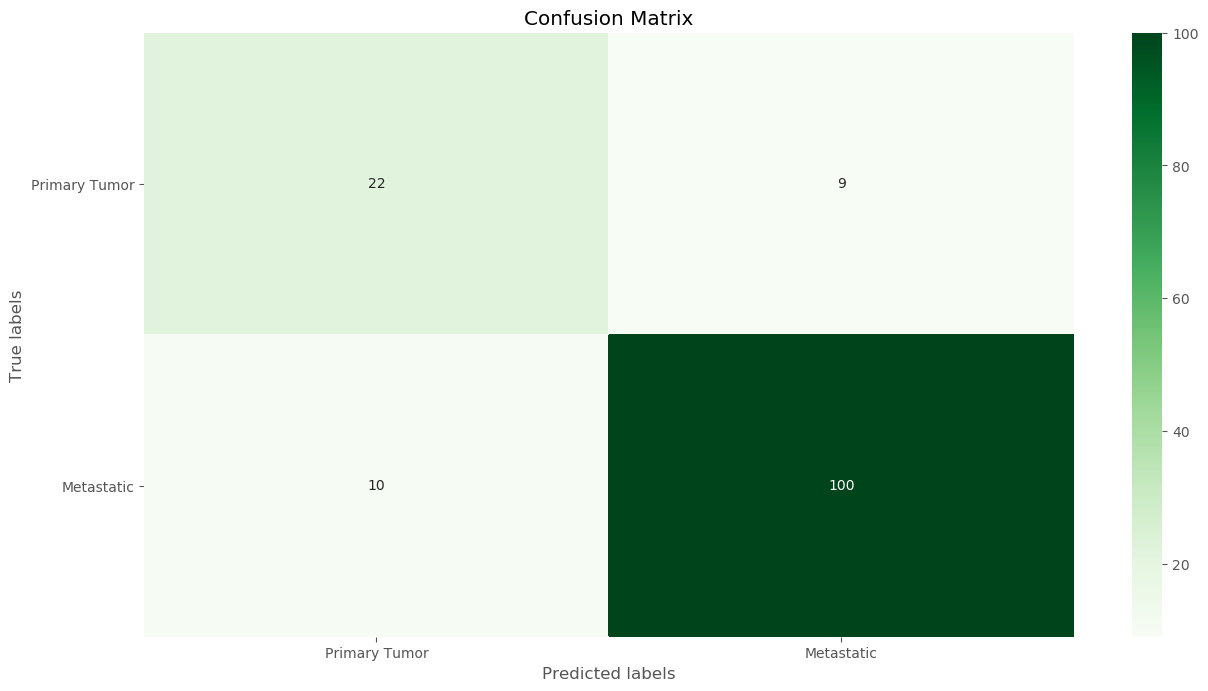

In [14]:
grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model_pca = model_classifier.classifier(pca_pipeline_params, grid_search_parameters, pca = True)

model_classifier.classifier_metrics(model_pca, confusion_matrix = True)

### Saving plots of Random Forest Estimators

In [24]:
from subprocess import check_call
from sklearn.tree import export_graphviz

# Get the final model
final_model = model[1].estimator

for index in range(0, final_model.n_estimators):
    export_graphviz(final_model.estimators_[index],
                     out_file="../data/rf_plot/rf_{}.dot".format(index),
                     feature_names = model_classifier.train_features.columns, 
                     class_names = model_classifier.label_values,
                     filled = True)


for index in range(0, final_model.n_estimators):
    check_call(['dot','-Tpng',"../data/rf_plot/rf_{}.dot".format(index),'-o',"../data/rf_plot/rf_{}.png".format(index)])


### Getting weights of each Features

In [31]:
rf_weights = pd.DataFrame(final_model.feature_importances_)
rf_weights.index = model_classifier.train_features.columns
rf_weights.columns = ["weights"]
rf_weights.sort_values(by=['weights'], inplace=True, ascending=False)
rf_weights.to_csv('../data/Melanoma_RF_weights_all_data.csv')
rf_weights

,weights
C7,0.248007
S100A7A,0.175506
KRTDAP,0.120084
S100A7,0.094369
KRT17,0.092066
CLEC2A,0.091707
WFDC5,0.057599
age_at_index,0.033616
KRT14,0.032463
KLK9,0.022931


### Save the model for deployment

In [32]:
joblib.dump(model, 'melanoma_classifier.pkl', compress=9)

['melanoma_classifier.pkl']

In [33]:
# Retrieve model
melanoma_classifier_model = joblib.load('melanoma_classifier.pkl')

## Using only Top 10 Genes

In [ ]:
features = [
       'C7', 'KRT17', 'S100A7A', 'CLEC2A', 'KRTDAP', 'WFDC5', 'KRT14',
       'S100A7', 'KLK9', 'LCE3D'
]

model_classifier = ModelClassifier(
    train = train_df, 
    validation = test_df, 
    label = 'sample_type', 
    label_values = ['Primary Tumor', 'Metastatic'],
    features = features, 
    label_binarizer = False)

lr_pipeline_params = [
    {
        'clf__estimator': [LogisticRegression(
                              solver='liblinear', 
                              max_iter=10000, 
                              tol=0.0001, 
                              fit_intercept=True)], 
        'clf__estimator__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
        'clf__estimator__penalty': ['l1', 'l2']    
    }
]

grid_search_parameters = {
    "n_jobs": 4, 
    "cv": 2, 
    "return_train_score": False, 
    "verbose": 3, 
    "scoring": ["accuracy", "f1"],
    "refit": "f1"
}

model = model_classifier.classifier(lr_pipeline_params, grid_search_parameters, pca = False)

model_classifier.classifier_metrics(model, confusion_matrix = True)

print("\nModel Parameters")
print("coefficients ",model[1].estimator.coef_)
print("intercept", model[1].estimator.intercept_)